                      y
time_utc               
2018-09-04 14:10  0.220
2018-09-04 14:11  0.187
2018-09-04 14:12  0.193
2018-09-04 14:13  0.186
2018-09-04 14:14  0.168
y    float64
dtype: object


<Axes: xlabel='time_utc'>

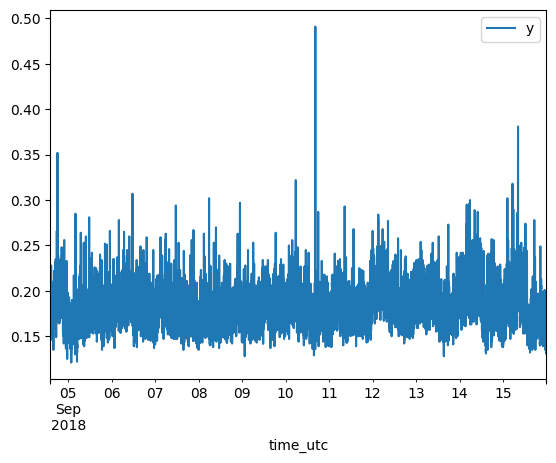

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# data = pd.read_csv('/home/lemateus/TCC/cintilacao/data/PRU2_2018-09-01_2018-09-15_9464c9cda8dce80d71af4c0f7524355bEDITADO.csv', na_values=[' ', ''], index_col = 'time_utc', parse_dates=True)
data = pd.read_csv('/home/lemateus/TCC/cintilacao/data/PRU2_2018-09-01_2018-09-15_9464c9cda8dce80d71af4c0f7524355bEDITADO.csv', index_col = 0, parse_dates=[0], header=0)

# data['time_utc'] = pd.to_datetime(data['time_utc'], format='%Y-%m-%d %H:%M:%S')
data = data[data.index >= '2018-09-04 14:10:00']
# data = data.loc[data['time_utc']>='2018-09-04 14:10:00']
# data = data.loc[data['time_utc']<='2018-09-13 13:54:00']
# values = data[' svid'].value_counts()[:4].index.tolist()
# values = data[' svid'].value_counts()[:6]
# print(values)
# data = data[data[' svid'].isin(values)]
data = data[data[' svid'] == 131]
data = data[[' s4']]
data.columns = ['y']
data['y'] = data['y'].astype(float)
data.index = data.index.to_period('min')
print(data.head())
# print(data)
# data.dropna(inplace=True)
# data.reset_index(drop=True, inplace=True)
# data = data[:1000]
# print(data)
# data = data[:50]

# train = data.loc[data['ds']<'2018-09-14 23:59:00']
# test = data.loc[data['ds']>='2018-09-14 23:59:00']
print(data.dtypes)
data.plot()
# data.to_csv('/home/lemateus/TCC/cintilacao/only_131.csv')
# data.interpolate('linear')
# print(data[data['y'] == data['y'].max()])
# data
# train

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

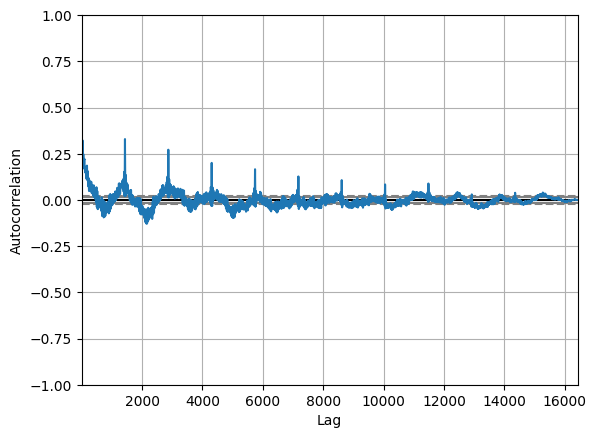

In [23]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data)


In [26]:
# fit model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data, order=(5,1,0))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                16430
Model:                 ARIMA(5, 1, 0)   Log Likelihood               44723.767
Date:                Wed, 06 Nov 2024   AIC                         -89435.534
Time:                        21:03:18   BIC                         -89389.293
Sample:                    09-04-2018   HQIC                        -89420.260
                         - 09-15-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4361      0.005    -80.366      0.000      -0.447      -0.425
ar.L2         -0.3258      0.004    -82.403      0.000      -0.334      -0.318
ar.L3         -0.2071      0.006    -33.922      0.0

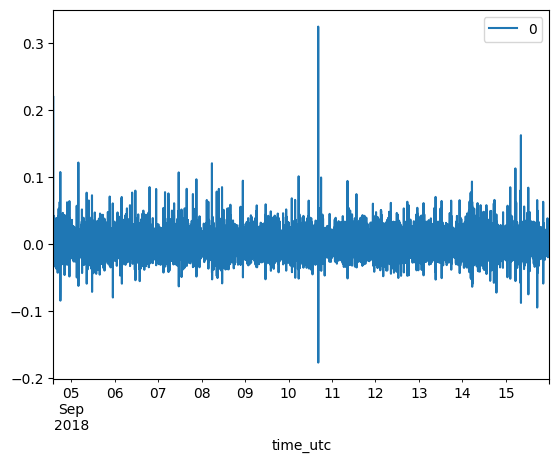

In [27]:
# line plot of residuals
from pandas import DataFrame
from matplotlib import pyplot

residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

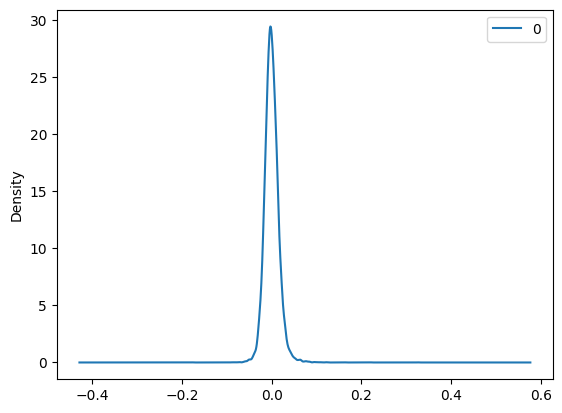

In [28]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

In [29]:
# summary stats of residuals
print(residuals.describe())

                  0
count  16430.000000
mean       0.000005
std        0.015997
min       -0.177048
25%       -0.009690
50%       -0.000931
75%        0.008796
max        0.325204
